In [21]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

Imports Successful


ibmqfactory.load_account:WARNING:2022-05-13 19:43:23,952: Credentials are already in use. The existing account in the session will be replaced.


In [22]:
#defining the U gates for mod 63
def c_amod63(a, power):
    """Controlled multiplication by a mod 63"""
    if a not in [2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20, 22, 23, 25, 26, 29, 31, 32, 34, 37, 38, 40, 41, 43, 44, 46, 47, 50, 52, 53, 55, 58, 59, 61, 62]:
        raise ValueError("'a' must be 2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20, 22, 23, 25, 26, 29, 31, 32, 34, 37, 38, 40, 41, 43, 44, 46, 47, 50, 52, 53, 55, 58, 59, 61, or 62")
    #the number of qubits used is 6 
    U = QuantumCircuit(6) 
    
    #implementing the swap gates for rotation 
    #we implement every number and see common behaivor between the numbers 
    for iteration in range(power):
        
        if a in [2,61]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)

        if a in [4, 59]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
            
        if a in [5, 58]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(0,4)
            U.swap(1,5)
            
        if a in [8, 55]:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            
        if a in [10, 53]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(0,4)
            U.swap(1,5)
            U.swap(0,2)
            U.swap(1,3)
            U.swap(0,4)
            U.swap(1,5)
            
        if a in [11, 52]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
        if a in [13, 50]:
            U.swap(0,5)
            U.swap(1,5)
            U.swap(2,5)
            U.swap(3,5)
            U.swap(4,5)
            
        if a in [16, 47]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
       # if a in [17, 46]:
       # if a in [19, 44]:
        if a in [20, 43]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
        if a in [22, 41]:
            U.swap(0,5)
            U.swap(1,5)
            U.swap(2,5)
            U.swap(3,5)
            U.swap(4,5)
        
        if a in [23, 40]: 
            U.swap(0,2)
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
            
        if a in [25, 38]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
       # if a in [26, 37]:
    
        if a in [29, 34]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
        if a in [31, 32]:
            U.swap(0,5)
            U.swap(1,5)
            U.swap(2,5)
            U.swap(3,5)
            U.swap(4,5)
    
        if a in [62]:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            
        if a in [5, 11, 13, 17, 19, 23, 25, 29, 31, 37, 41, 43, 47, 53, 55, 59, 61]:
            for q in range(6):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 63" % (a, power)
    c_U = U.control()
    return c_U

In [23]:
# Specify variables
n_count = 10  # number of counting qubits
a = 13

In [24]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

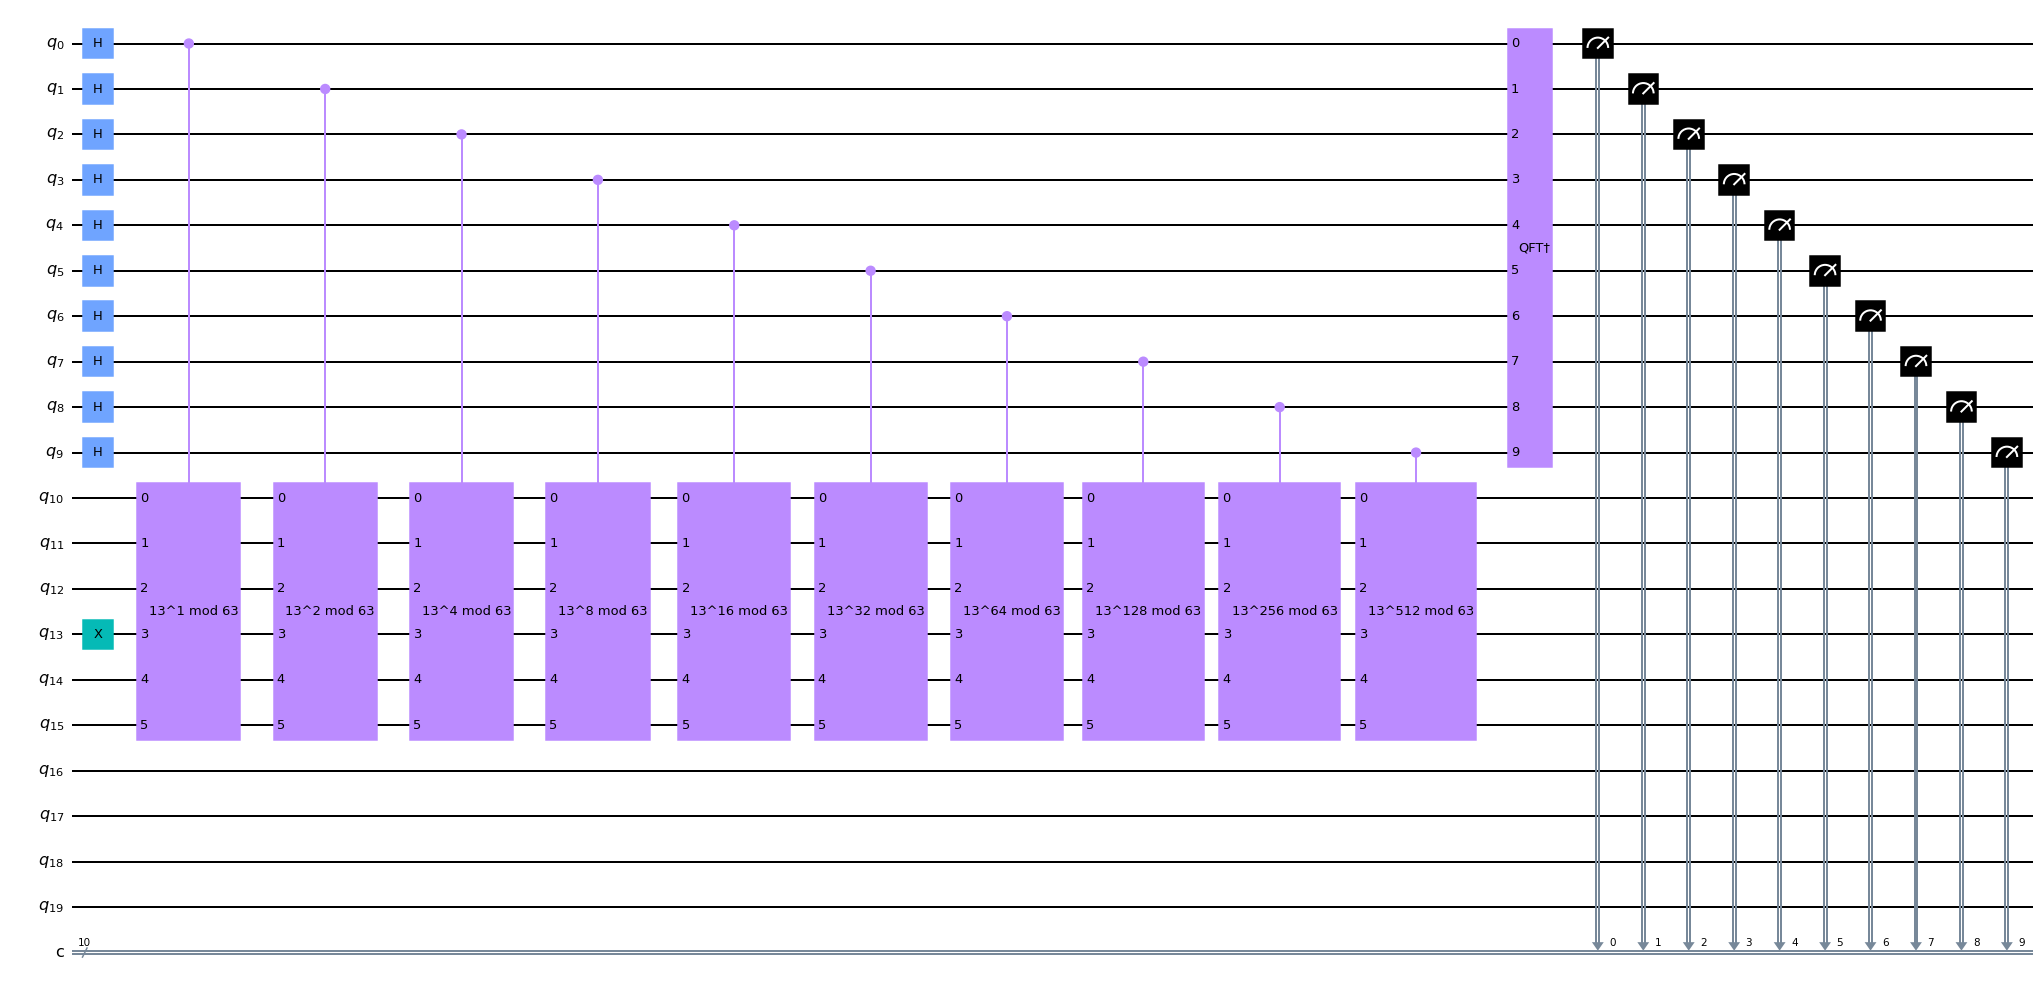

In [25]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 10, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod63(a, 2**q), 
             [q] + [i+n_count for i in range(6)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold' 

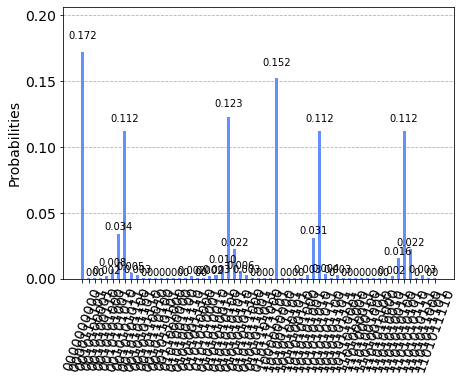

In [26]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [27]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

               Register Output            Phase
0   1101001001(bin) = 841(dec)  841/1024 = 0.82
1   0101101000(bin) = 360(dec)  360/1024 = 0.35
2   1101010010(bin) = 850(dec)  850/1024 = 0.83
3   1101010011(bin) = 851(dec)  851/1024 = 0.83
4   0101001100(bin) = 332(dec)  332/1024 = 0.32
5   0101001110(bin) = 334(dec)  334/1024 = 0.33
6   0011000000(bin) = 192(dec)  192/1024 = 0.19
7   0010100110(bin) = 166(dec)  166/1024 = 0.16
8   1010100110(bin) = 678(dec)  678/1024 = 0.66
9   1010100101(bin) = 677(dec)  677/1024 = 0.66
10  0101010001(bin) = 337(dec)  337/1024 = 0.33
11  1101001100(bin) = 844(dec)  844/1024 = 0.82
12  0101011011(bin) = 347(dec)  347/1024 = 0.34
13  0101111101(bin) = 381(dec)  381/1024 = 0.37
14  0101001111(bin) = 335(dec)  335/1024 = 0.33
15  1101010000(bin) = 848(dec)  848/1024 = 0.83
16  0101010000(bin) = 336(dec)  336/1024 = 0.33
17  1101000100(bin) = 836(dec)  836/1024 = 0.82
18  0010110100(bin) = 180(dec)  180/1024 = 0.18
19  1101000011(bin) = 835(dec)  835/1024

In [28]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [29]:
# Get fraction that most closely resembles 0.666
# with denominator < 63
Fraction(0.666).limit_denominator(63)

Fraction(2, 3)

In [30]:

rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(63)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

       Phase Fraction  Guess for r
0   0.821289    23/28           28
1   0.351562    13/37           37
2   0.830078    44/53           53
3   0.831055    49/59           59
4   0.324219    12/37           37
5   0.326172    15/46           46
6   0.187500     3/16           16
7   0.162109     6/37           37
8   0.662109    41/62           62
9   0.661133    39/59           59
10  0.329102    20/61           61
11  0.824219    47/57           57
12  0.338867    20/59           59
13  0.372070    16/43           43
14  0.327148    18/55           55
15  0.828125    29/35           35
16  0.328125    20/61           61
17  0.816406    40/49           49
18  0.175781    10/57           57
19  0.815430    31/38           38
20  0.710938    32/45           45
21  0.672852    37/55           55
22  0.165039    10/61           61
23  0.835938    51/61           61
24  0.665039      2/3            3
25  0.169922     9/53           53
26  0.000000      0/1            1
27  0.832031      5/